<a href="https://colab.research.google.com/github/nasif-raihan/ML-and-DL-Codes/blob/main/Image_Segmentation_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Followed by: [ A Step-by-Step Introduction to Image Segmentation Techniques](https://www.analyticsvidhya.com/blog/2019/04/introduction-image-segmentation-techniques-python/#h2_6)

In [1]:
from google.colab import drive

drive._mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
%matplotlib inline

(192, 263, 3)


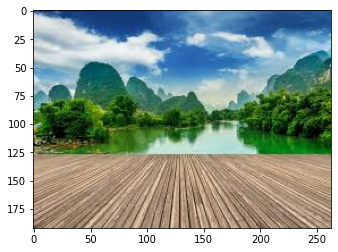

In [3]:
path = '/content/drive/MyDrive/Lab/1.jpeg'

image = plt.imread(path)
print(image.shape)
plt.imshow(image)
plt.show()

# Region-based Segmentation

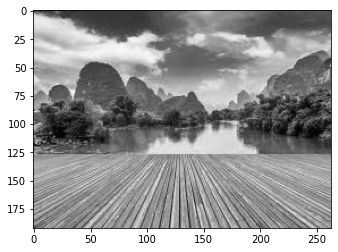

In [4]:
gray = rgb2gray(image)
plt.imshow(gray, cmap='gray')
plt.show()

In [5]:
gray.shape

(192, 263)

In [6]:
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])

gray_r.shape, gray_r.mean()

((50496,), 0.5175623838036483)

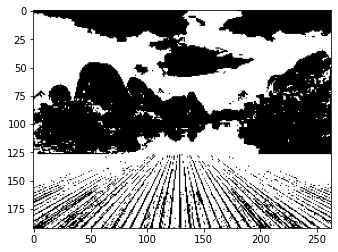

In [7]:
for i in range(gray_r.shape[0]):
  if gray_r[i] > gray_r.mean():
    gray_r[i] = 1 
  else:
    gray_r[i] = 0

gray = gray_r.reshape(gray.shape[0], gray.shape[1])
plt.imshow(gray, cmap='gray')
plt.show()

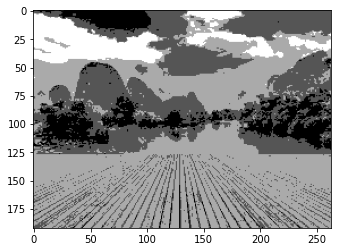

In [8]:
gray = rgb2gray(image)

gray_r = gray.reshape(gray.shape[0]*gray.shape[1])

for i in range(gray_r.shape[0]):
  if gray_r[i] > gray_r.mean():
    gray_r[i] = 3
  elif gray_r[i] > 0.5:
    gray_r[i] = 2
  elif gray_r[i] > 0.25:
    gray_r[i] = 1
  else:
    gray_r[i] = 0

gray = gray_r.reshape(gray.shape[0], gray.shape[1])

plt.imshow(gray, cmap='gray')
plt.show()

# Edge Detection Segmentation

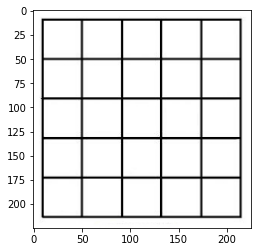

In [9]:
path = '/content/drive/MyDrive/Lab/5x5.png'

image = plt.imread(path)

plt.imshow(image)
plt.show()

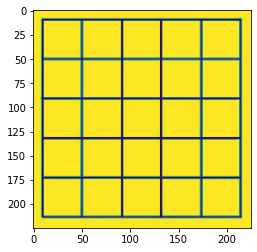

In [10]:
gray = rgb2gray(image)

plt.imshow(gray)
plt.show()

In [11]:
# defining the sobel filters

sobel_horizontal = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
sobel_vertical = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

print('sobel_horizontal filter: \n', sobel_horizontal, "\n", '\nsobel_vertical filter: \n', sobel_vertical)

sobel_horizontal filter: 
 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]] 
 
sobel_vertical filter: 
 [[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


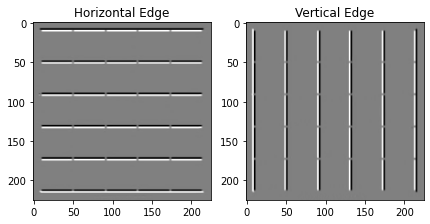

In [12]:
out_h = ndimage.convolve(gray, sobel_horizontal, mode='reflect')
out_v = ndimage.convolve(gray, sobel_vertical, mode='reflect')

plt.figure(figsize=(7, 7))

plt.subplot(1,2,1)
plt.imshow(out_h, cmap='gray')
plt.title('Horizontal Edge')

plt.subplot(1,2,2)
plt.imshow(out_v, cmap='gray')
plt.title('Vertical Edge')
plt.show()

**Laplace operator can detect both horizontal and vertical edges at the same time.**

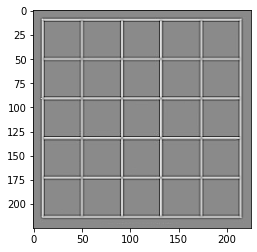

In [13]:
kernel_laplace = np.array([[1,1,1], [1, -8, 1], [1, 1, 1]])

out_l = ndimage.convolve(gray, kernel_laplace, mode='reflect')

plt.imshow(out_l, cmap='gray')

# Image Segmentation based on Clustering

(192, 263, 3)


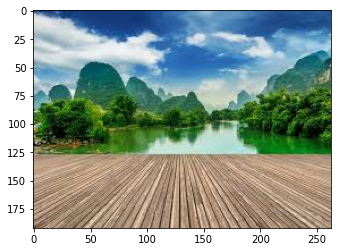

In [14]:
path = '/content/drive/MyDrive/Lab/1.jpeg'

pic = plt.imread(path)/255

print(pic.shape)

plt.imshow(pic)
plt.show()

In [15]:
pic_n = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2])

pic_n.shape

(50496, 3)

In [16]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7, random_state=0).fit(pic_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_]

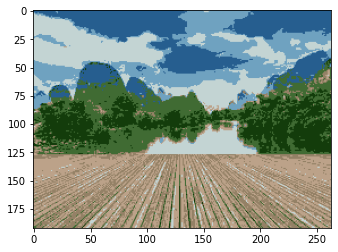

In [17]:
cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])

plt.imshow(cluster_pic)
plt.show()